In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
particlesDict = {}


In [3]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [4]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [5]:
for e in pylheV.readLHE('pp2ttbar_out.lhe'):
    for i in range(int(e.eventinfo.nparticles)):
            if e.particles[i].id == 24:
                daughters =  e.particles[i].daughters
                mother1 = e.particles[i].daughters
                print('daughters =',daughters, 'mom =', i)
                
         
                

daughters = [739, 739] mom = 735
daughters = [751, 752] mom = 739
daughters = [461, 461] mom = 457
daughters = [491, 492] mom = 461
daughters = [666, 667] mom = 659
daughters = [352, 352] mom = 348
daughters = [412, 413] mom = 352
daughters = [1021, 1021] mom = 1017
daughters = [1039, 1040] mom = 1021
daughters = [802, 802] mom = 798
daughters = [826, 827] mom = 802
daughters = [302, 302] mom = 298
daughters = [308, 309] mom = 302
daughters = [209, 209] mom = 205
daughters = [212, 213] mom = 209
daughters = [152, 152] mom = 148
daughters = [182, 183] mom = 152
daughters = [273, 273] mom = 269
daughters = [282, 283] mom = 273


In [6]:
def invariant_mass(file_name, pid):
    invariant_mass = []
    for e in pylheV.readLHE(file_name):
        for i in range(int(e.eventinfo.nparticles)):
            if e.particles[i].id == pid:
                #Getting daughters
                daughters =  e.particles[i].daughters
                
                #Finding the final daughters
                f_daughters = final_daughters(e.particles,daughters)
                
                
                #Calculating the invariant mass
                energy = 0
                px = 0
                py = 0
                pz = 0
                #Sum component with component of all final daughters
                for j in range(len(f_daughters)):

                    energy = energy + e.particles[f_daughters[j]].e
                    px = px + e.particles[f_daughters[j]].px
                    py = py + e.particles[f_daughters[j]].py
                    pz = pz + e.particles[f_daughters[j]].pz

                inv_mass = np.sqrt(energy**2 - px**2 - py**2 - pz**2)

                invariant_mass.append(inv_mass)
                
    return invariant_mass
                 

In [7]:
def final_daughters(particles,daughters):
    
    #Removing repeated daughters
    d = [] 
    for i in daughters: 
        if i not in d: 
            d.append(i) 
            
   
    daughters = d
    
    #While all of daughtres arent final the function searchs for daughters of no final daughters.
    k = 0
    while(k!=len(daughters)):
        if particles[daughters[k]].status < 0:
            daughters = daughters + particles[daughters[k]].daughters
            daughters.pop(k)
            return final_daughters(particles,daughters)
        
            
        k = k+1
        
    
    return daughters
            

In [8]:
def rm_repeated(vector):
    #Removing repeated elements
    d = [] 
    for i in vector: 
        if i not in d: 
            d.append(i) 
   
    return d

In [9]:
def all_daughters(particles,daughters):
    
    daughters = rm_repeated(daughters)
    generations = [daughters,[]]
    #While all of daughters arent final the function searchs for daughters.
    k = 1
    out = False
    while(out == False):
        new_gen = []
        for i in range(len(generations[k-1])):
            new_gen += particles[generations[k-1][i]].daughters
        new_gen = rm_repeated(new_gen)
        generations[k] += new_gen
        if (len(generations[k]) == 0):
            out = True
        else:
            generations.append([])
            k = k + 1
            
    generations.pop(len(generations)-1)
            
    return generations
            

            

In [10]:
def generations(particles,daughters):
    
    daughters = rm_repeated(daughters)
    gen = [daughters,[]]
    #While all of daughters arent final the function searchs for daughters.
    k = 1
    out = False
    while(out == False):
        new_gen = []
        for i in range(len(gen[k-1])):
            if particles[gen[k-1][i]].status < 0:
                new_gen += particles[gen[k-1][i]].daughters
            else:
                new_gen += [gen[k-1][i]]
        new_gen = rm_repeated(new_gen)
        gen[k] += new_gen
        if all_final(gen[k], particles) == True:
            out = True
        else:
            gen.append([])
            k = k + 1
            
    gen.pop(len(gen)-1)
            
    return gen
            

    

In [11]:
def all_final(gen, particles):
    
    for i in gen:
        if particles[i].status < 0:
            return False
        
    return True

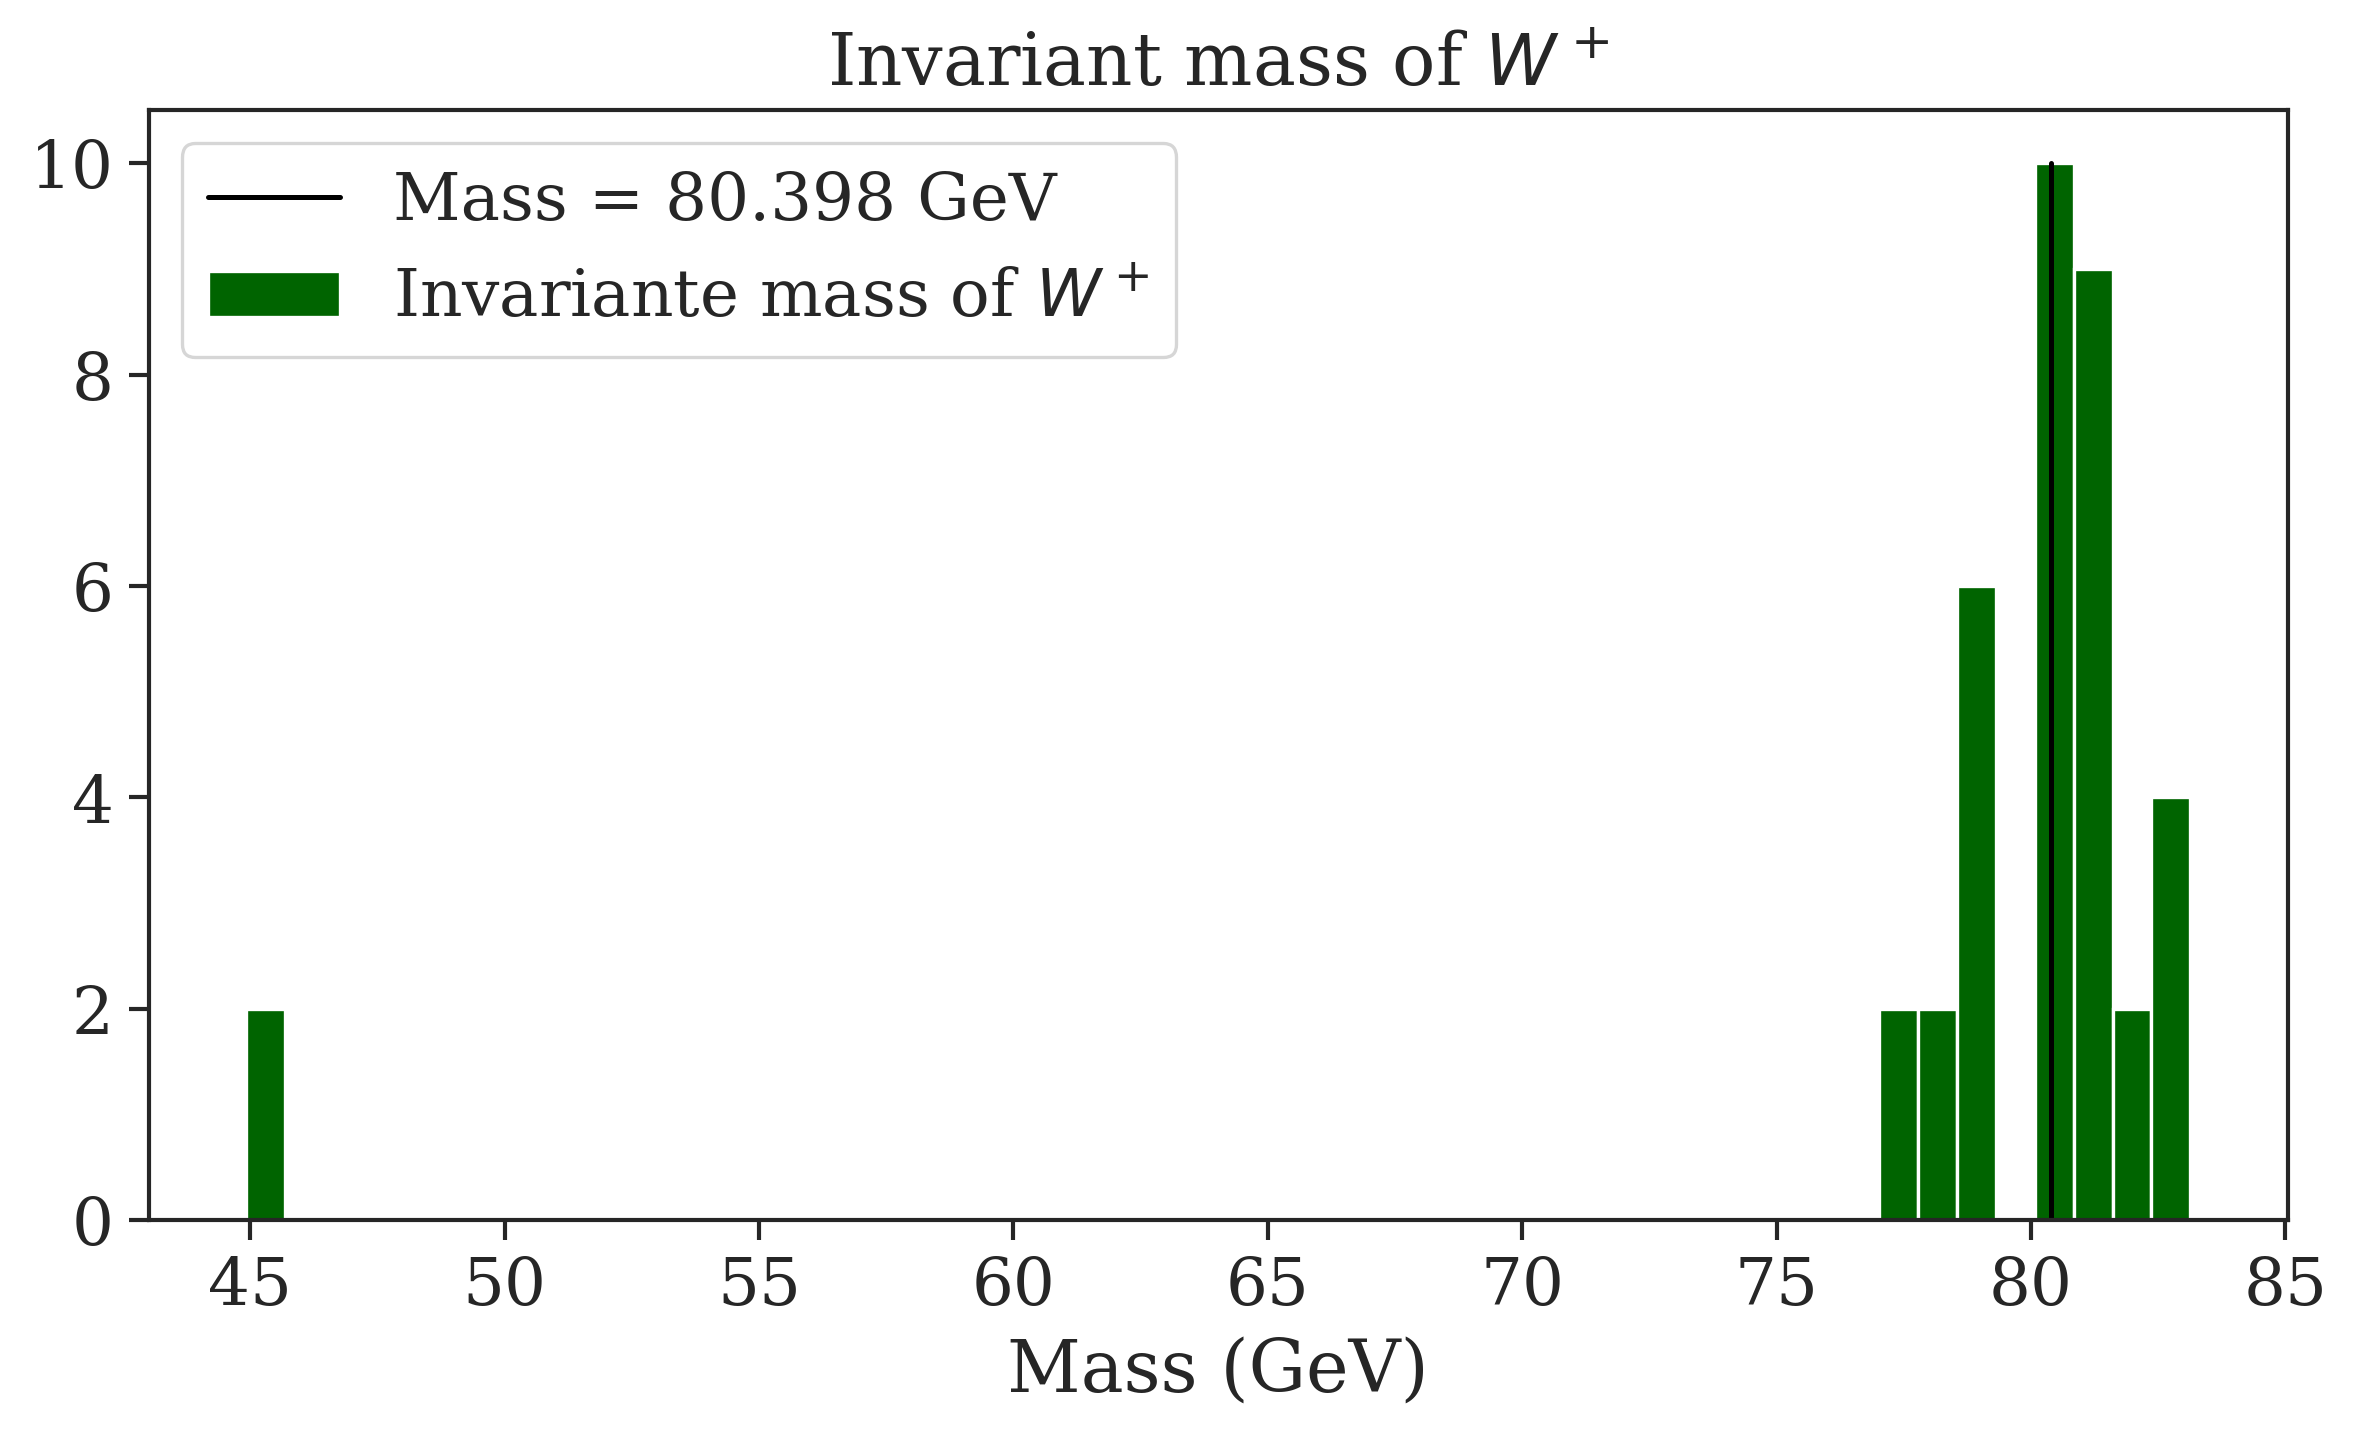

In [12]:
#Invariant mass
w_mass = invariant_mass('pp2ttbar_out.lhe',24)
w_mass = w_mass + invariant_mass('pp2ttbar_out.lhe',-24)
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(w_mass, bins = 50, color = 'darkgreen',label =r'Invariante mass of $W^+$')
plt.plot([80.398,80.398],[0,10], color = 'black', label = r'Mass = 80.398 GeV')

plt.xlabel(r'Mass (GeV)')
plt.title(r'Invariant mass of $W^+$')
plt.legend()
plt.show()

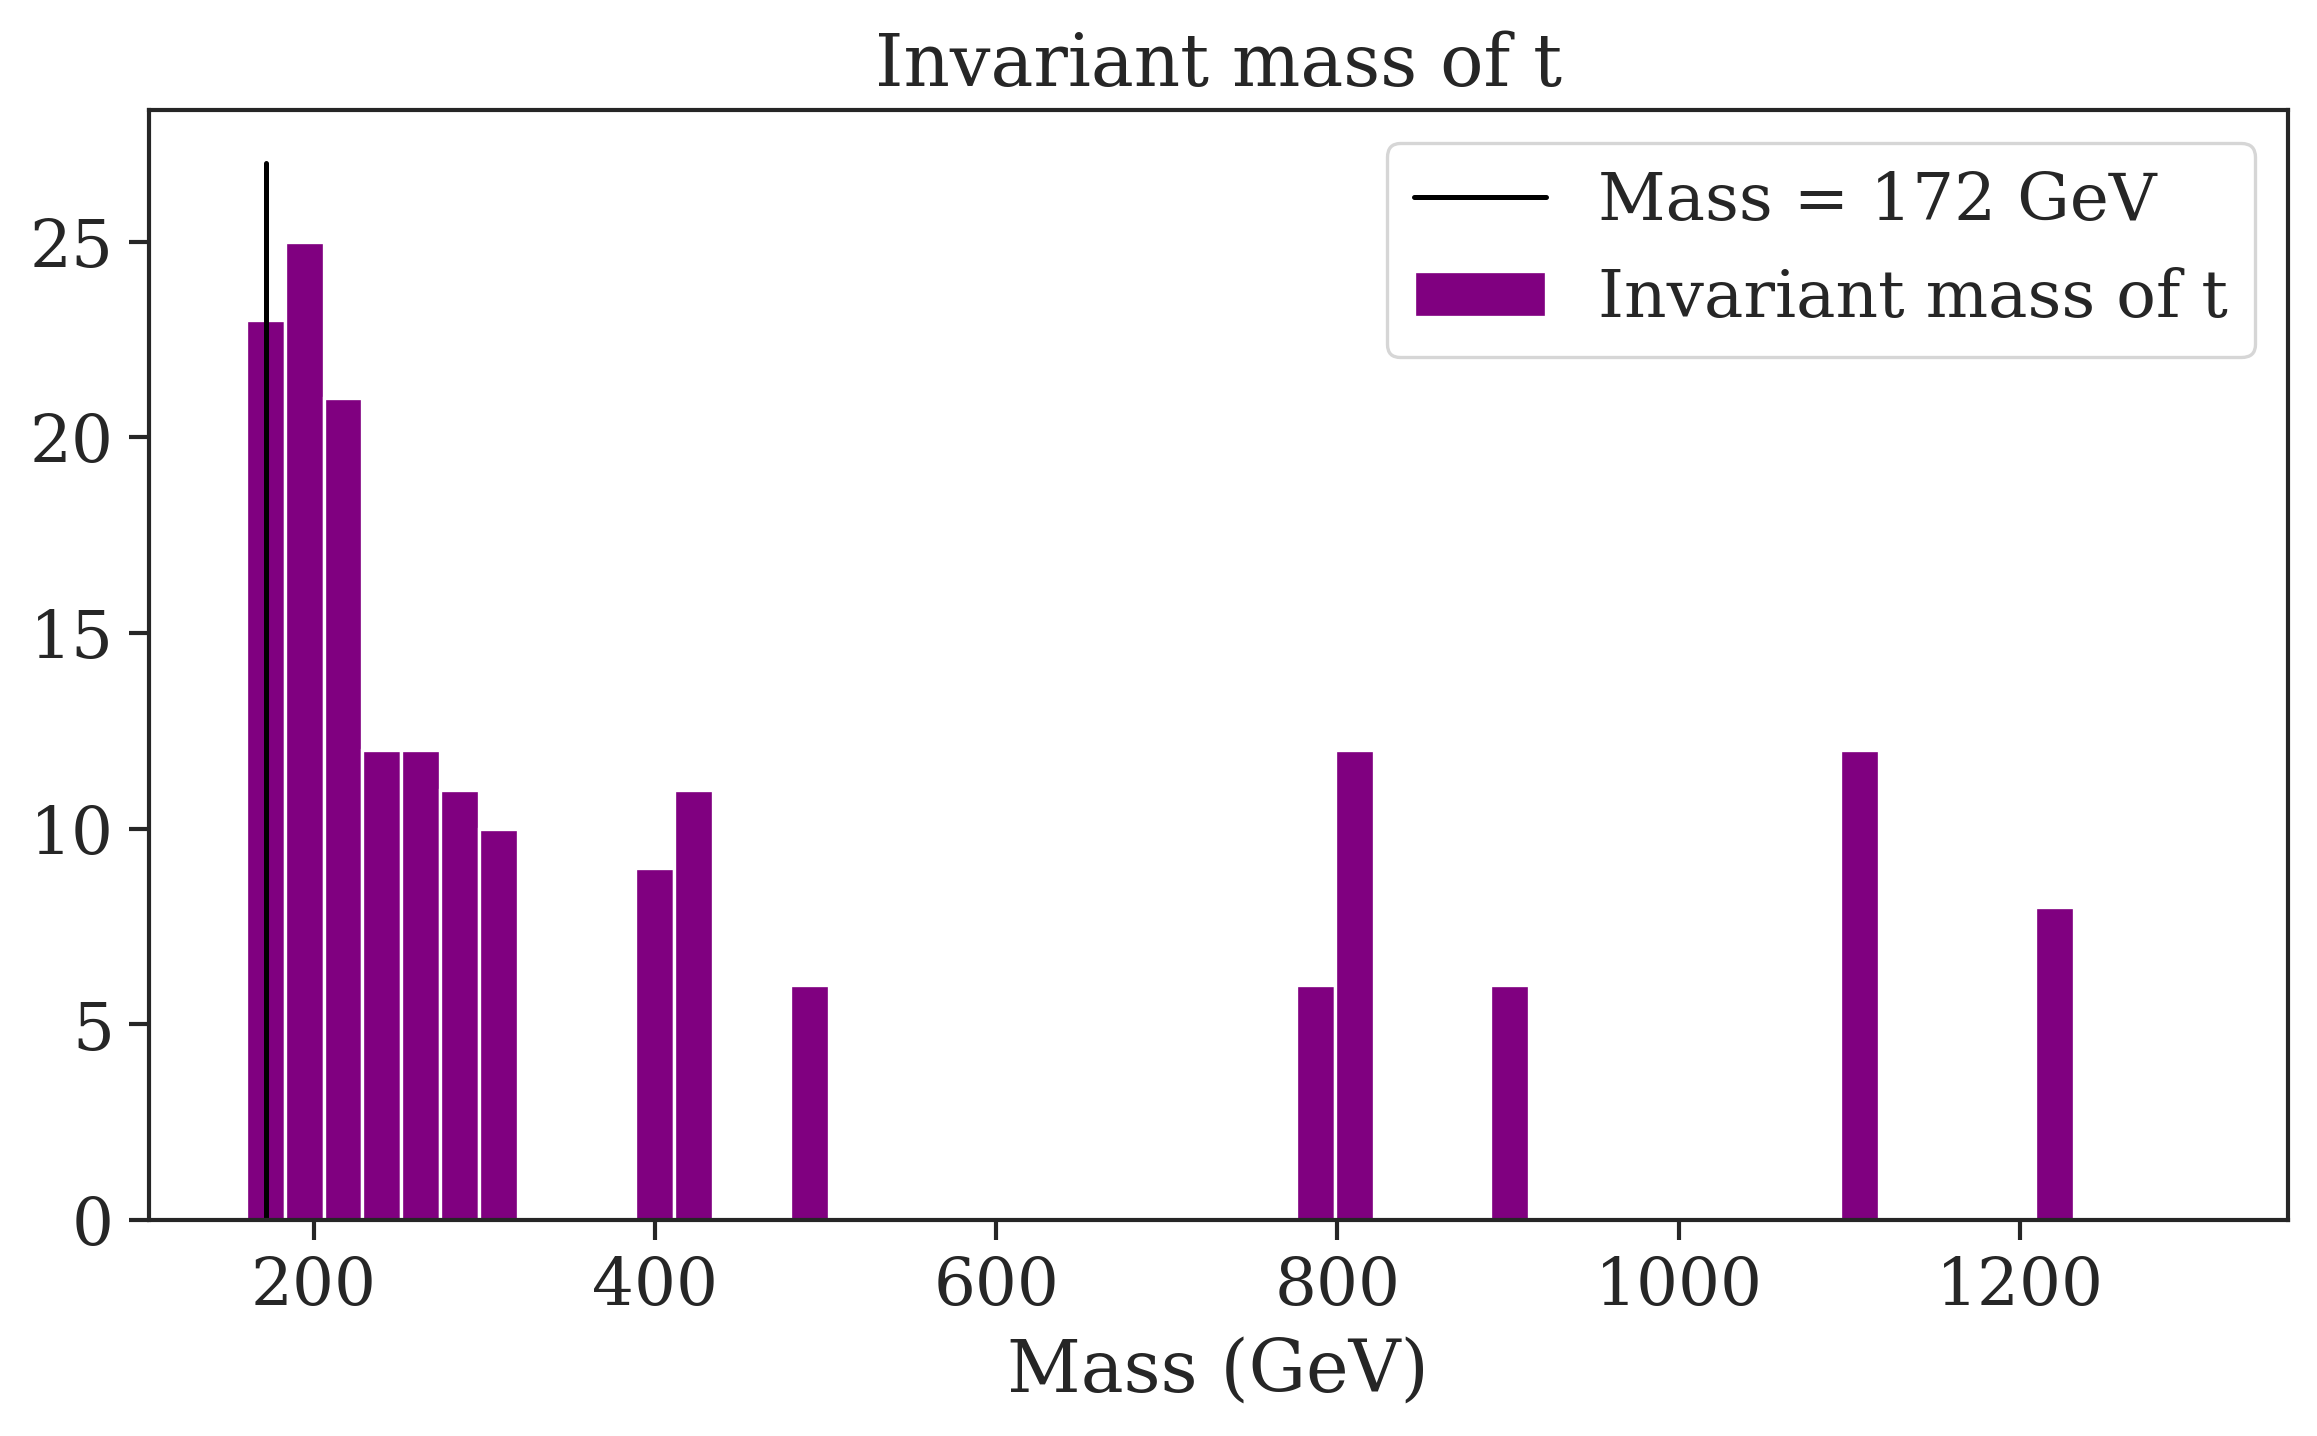

In [13]:
#Invariant mass
t_mass = invariant_mass('pp2ttbar_out.lhe',6)
t_mass = t_mass + invariant_mass('pp2ttbar_out.lhe',-6)
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(t_mass, bins = 50, range = [160,1300], color = 'purple', label = 'Invariant mass of t')
plt.plot([172,172],[0,27], color = 'black', label = r'Mass = 172 GeV')

plt.xlabel(r'Mass (GeV)')
plt.title(r'Invariant mass of t')
plt.legend()
plt.show()

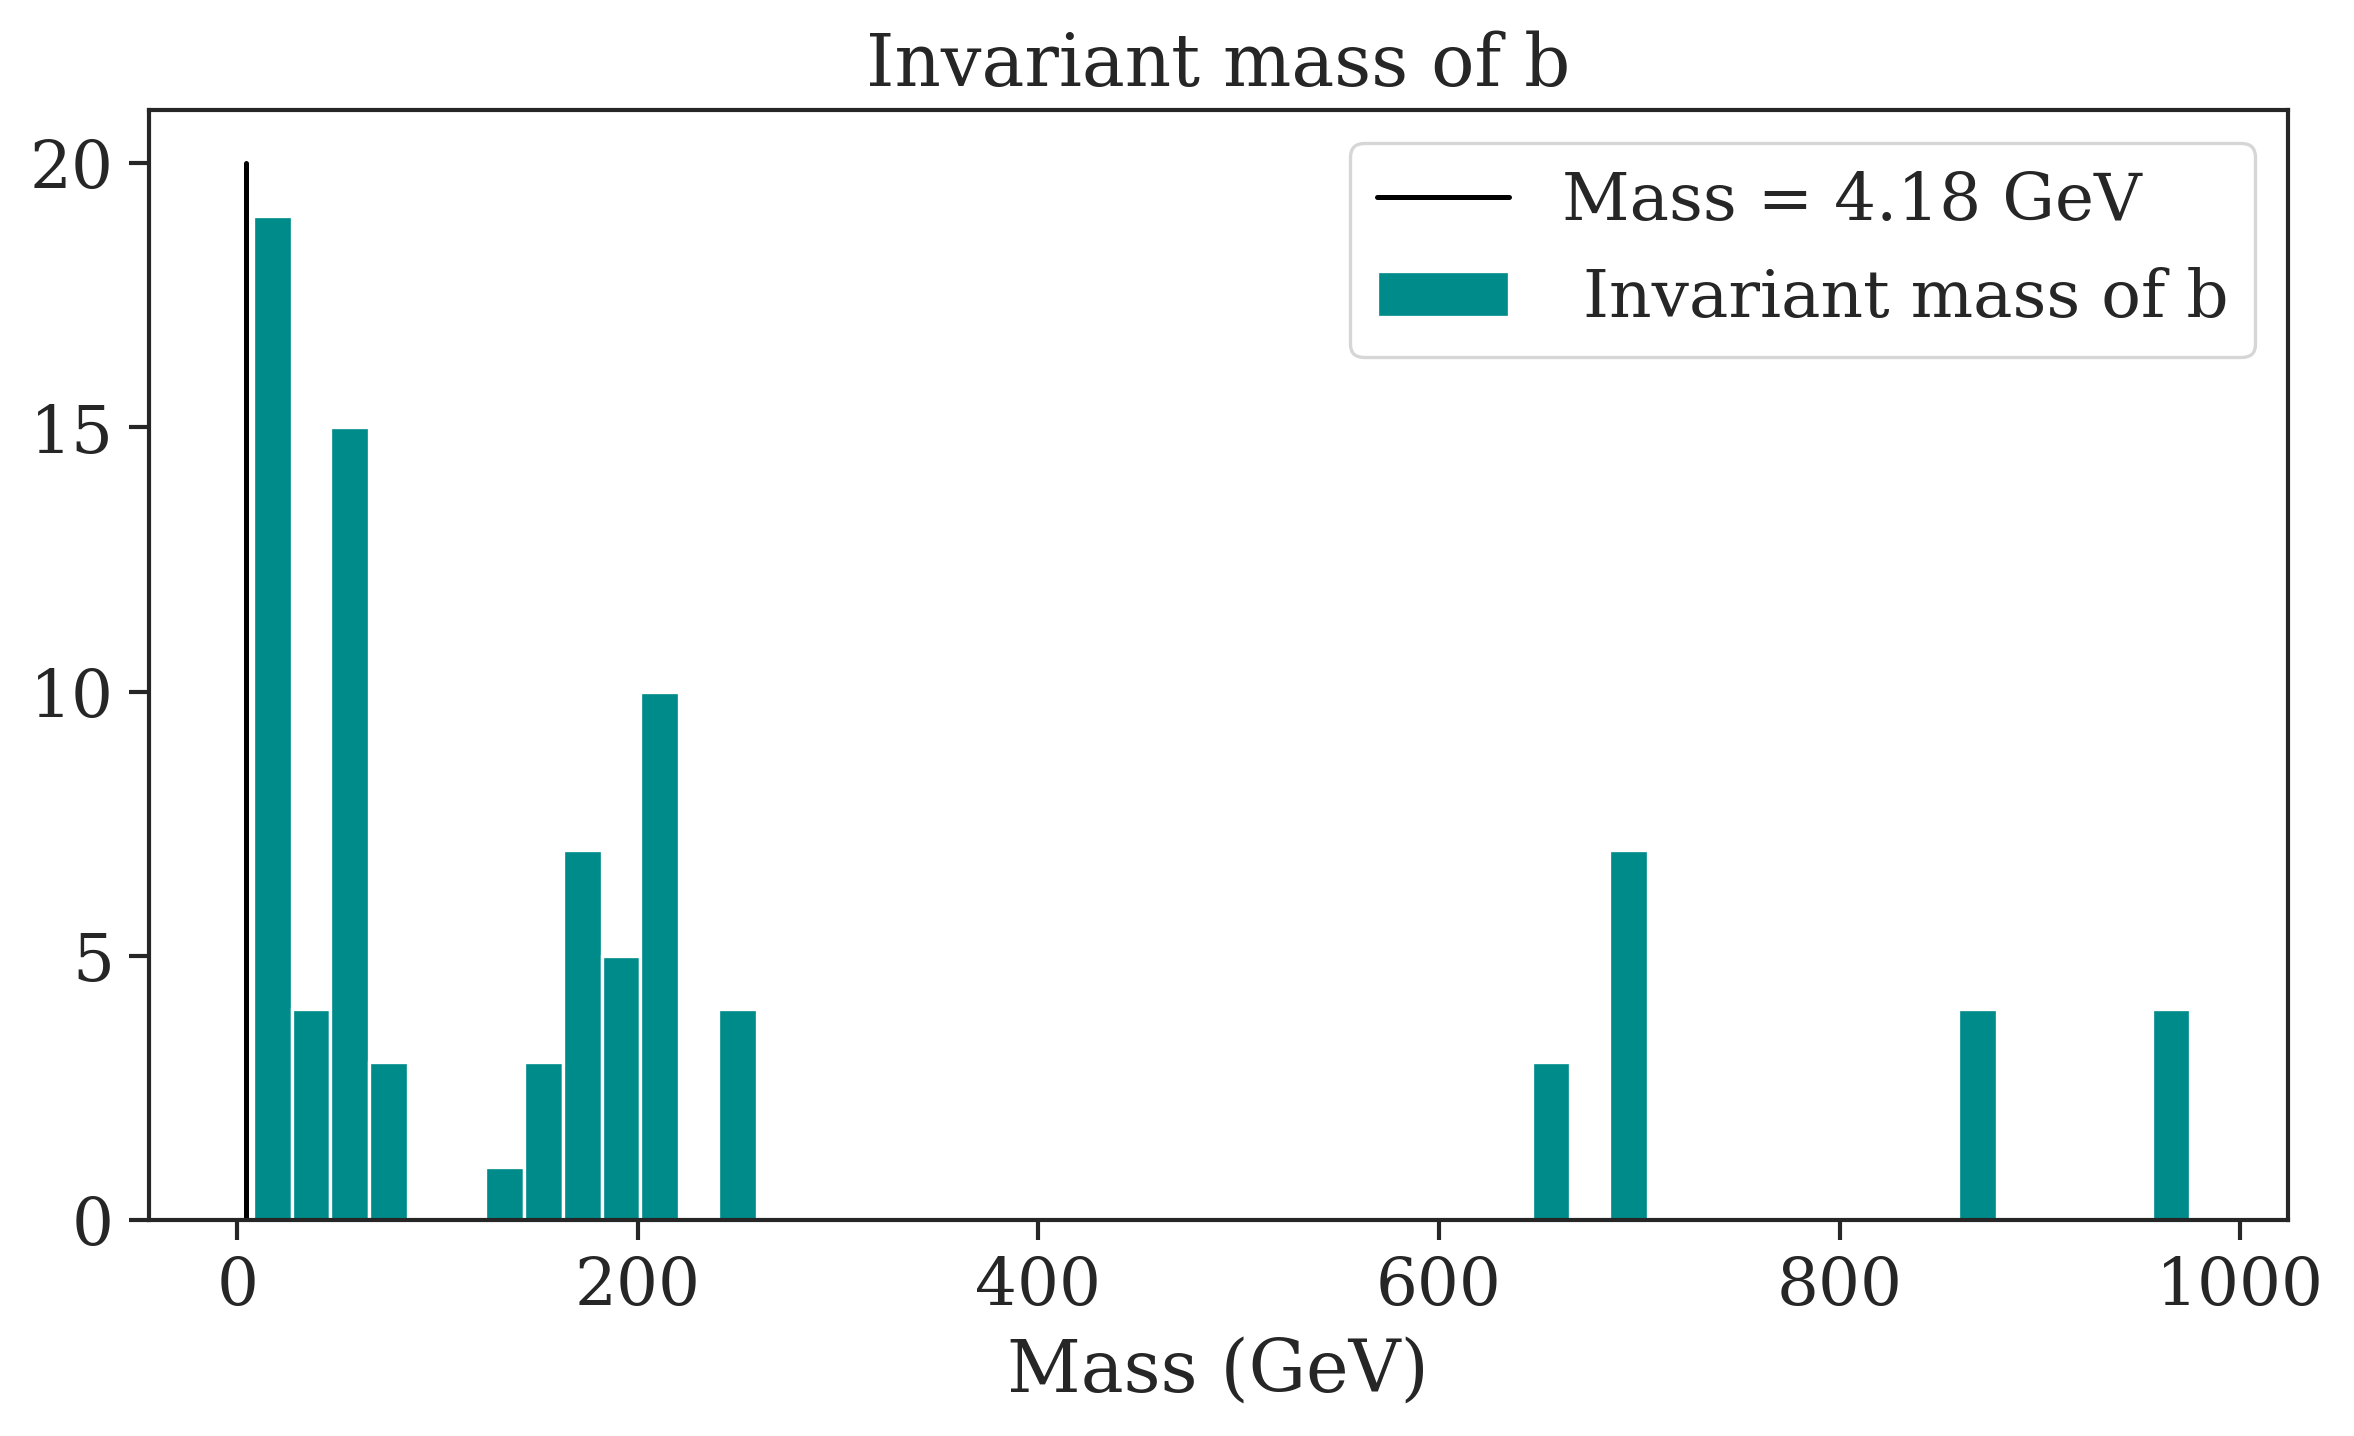

In [14]:
#Invariant mass
b_mass = invariant_mass('pp2ttbar_out.lhe',5)
b_mass = b_mass + invariant_mass('pp2ttbar_out.lhe',-5)
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(b_mass, bins = 50, color = 'darkcyan', label = r' Invariant mass of b')
plt.plot([4.18,4.18],[0,20], color = 'black', label = r'Mass = 4.18 GeV')

plt.xlabel(r'Mass (GeV)')
plt.title(r'Invariant mass of b')
plt.legend()
plt.show()

In [40]:
full_daughters = []
for e in pylheV.readLHE('pp2ttbar_gen.lhe'):
    i = 0
    out = False
    while ((i != range(int(e.eventinfo.nparticles))) and out == False):
        if e.particles[i].id == 6:
            daughters =  e.particles[i].daughters
            full_daughters.append(generations(e.particles,daughters))
            out = True
        i += 1
print(full_daughters[0])

[[9], [14], [20], [47], [550], [735, 736], [739, 737, 738], [751, 752, 742, 740, 741], [753, 754, 755, 1082, 1084, 1083], [758, 756, 757, 761, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125], [767, 759, 760, 765, 766, 779, 1600, 1601, 1602, 1603, 1095, 1604, 1605, 1606, 1607, 1608, 1609, 1098, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1103, 1368, 1369, 1105, 1370, 1371, 1372, 1373, 1374, 1375, 1109, 1610, 1611, 1612, 1613, 1376, 1377, 1113, 1378, 1379, 1115, 1116, 1614, 1615, 1118, 1119, 1120, 1380, 1381, 1382, 1383, 1123, 1616, 1617, 1125], [987, 762, 763, 764, 774, 775, 986, 978, 1876, 1877, 1601, 1602, 1603, 1095, 1604, 1605, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1098, 1453, 1744, 1745, 1363, 1364, 1746, 1747, 1366, 1367, 1103, 1368, 1748, 1749, 1105, 1370, 1371, 1372, 1373, 1374, 1375, 1109, 1610, 1611, 1612, 1613, 1376, 1377, 111

In [41]:
gen = [[],[],[]]
energy = [[],[],[]]
momentum_x = [[],[],[]]
momentum_y = [[],[],[]]
momentum_z = [[],[],[]]
for i,e in enumerate(pylheV.readLHE('pp2ttbar_gen.lhe')):
    for j,f_dau in enumerate(full_daughters[i]):
        for k in range(len(f_dau)):
            energy[i].append((e.particles[f_dau[k]].e,particlesDict[abs(e.particles[f_dau[k]].id)]['name']))
            momentum_x[i].append(e.particles[f_dau[k]].px)
            momentum_y[i].append(e.particles[f_dau[k]].py)
            momentum_z[i].append(e.particles[f_dau[k]].pz)
            gen[i].append(j)
            



In [42]:
total_e = np.zeros(gen[0][len(gen[0])-1]+1)
total_px = np.zeros(gen[0][len(gen[0])-1]+1)
total_py = np.zeros(gen[0][len(gen[0])-1]+1)
total_pz = np.zeros(gen[0][len(gen[0])-1]+1)
px = np.array(momentum_x[0])
py = np.array(momentum_y[0])
pz = np.array(momentum_z[0])
energy1 = np.array(energy[0], dtype=[('energy', 'f4'), ('name', 'U10')])
for i,g in enumerate(gen[0]):
    total_e[g] += energy1['energy'][i]
    total_px[g] += px[i]
    total_py[g] += py[i]
    total_pz[g] += pz[i]
    

In [44]:

print('invariant mass =',np.sqrt(total_e**2-total_px**2-total_py**2-total_pz**2))
print('energy =', total_e)
#print(energy1)
#print(gen[0])

invariant mass = [173.00001915 173.0000526  172.9999796  173.00003984 172.99999441
 172.99995212 173.00000078 173.00000257 173.00000468 486.50595779
 487.12568128 488.56104539 521.24640041 516.91630423 510.00716416
 497.41929243]
energy = [181.55580139 178.67610168 178.68119812 179.17129517 179.14920044
 179.14915848 179.14920676 179.14920902 179.14921188 646.33217111
 646.71674329 647.8149684  670.25751971 667.31162956 661.98409407
 653.96953933]


In [39]:
energy1 = np.array(energy[0], dtype=[('energy', 'f4'), ('name', 'U10')])

fig = plt.figure(figsize = [30,30], dpi = 300)

plt.plot(gen[0],energy1['energy'],'o')

for i,pt in enumerate(energy1):
    plt.annotate(pt['name'],(0.1+ gen[0][i],pt['energy']))

plt.yscale('log')
plt.savefig('evolution1.pdf')
plt.show()

In [28]:
energy2 = np.array(energy[1], dtype=[('energy', 'f4'), ('name', 'U10')])

fig = plt.figure(figsize = [30,30], dpi = 300)

plt.plot(gen[1],energy2['energy'],'o')

for i,pt in enumerate(energy2):
    plt.annotate(pt['name'],(0.1+ gen[1][i],pt['energy']))

plt.yscale('log')
plt.savefig('evolution2.pdf')
plt.show()

In [29]:
energy3 = np.array(energy[2], dtype=[('energy', 'f4'), ('name', 'U10')])

fig = plt.figure(figsize = [30,30], dpi = 300)

plt.plot(gen[2],energy3['energy'],'o')

for i,pt in enumerate(energy3):
    plt.annotate(pt['name'],(0.1+ gen[2][i],pt['energy']))

plt.yscale('log')
plt.savefig('evolution3.pdf')
plt.show()